## This notebook shows how data can be used

In [3]:
import pandas as pd
from pathlib import Path
from definitions import ROOT_DIR
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
p_analysis = Path(ROOT_DIR)

# Compounds name and ID information
p_compounds = p_analysis / "compounds_ids.csv"

# Compound mapping to wells
p_wellmap = p_analysis / "wellmap.csv"

# Metrics and Catboost predictions for all ions in their target wells
p_predictions = p_analysis / "all_predictions_24-Jun-2021.csv"

# Dataset info (lab, matrix, polarity, m/z range, ids, etc.)
p_datasets = p_analysis / "datasets.csv"

# Custom chemical classes
p_chem_class = p_analysis / "custom_classification.csv"

## Coming soon:
# p_struct_class
# p_propeties
# p_pathways

In [5]:
compounds = pd.read_csv(p_compounds, index_col='internal_id')
wellmap = pd.read_csv(p_wellmap, index_col='internal_id')
chem_class = pd.read_csv(p_chem_class, index_col='internal_id')

datasets = pd.read_csv(p_datasets)

predictions = pd.read_csv(p_predictions, index_col=0)
predictions.neutral_loss.fillna('', inplace=True)

In [6]:
# View files
datasets.head()

,Project,Participant lab,Technology,Matrix long,Matrix short,Polarity,m/z range,Slide code,Pixel sixe,Additional information,Visible issues,Visual quality,Annotation QC,Dataset ID,Clone ID,Original link,Clone link
0,20 matrices,EMBL,AP-SMALDI5/Orbitrap,"2,5-dihydroxybenzoic acid",DHB,pos,70-350,7J,150,NaN,NaN,NaN,NaN,2021-02-17_18h14m40s,2021-06-21_12h45m04s,https://metaspace2020.eu/annotations?ds=2021-0...,https://metaspace2020.eu/annotations?ds=2021-0...
1,20 matrices,EMBL,AP-SMALDI5/Orbitrap,"2,5-dihydroxybenzoic acid",DHB,pos,300-1510,7J,150,NaN,NaN,NaN,NaN,2021-02-19_12h11m04s,2021-06-21_12h45m04s,https://metaspace2020.eu/annotations?ds=2021-0...,https://metaspace2020.eu/annotations?ds=2021-0...
2,20 matrices,EMBL,AP-SMALDI5/Orbitrap,"2,5-dihydroxybenzoic acid",DHB,neg,70-350,7J,150,NaN,NaN,NaN,NaN,2021-02-17_15h44m30s,2021-06-18_10h54m38s,https://metaspace2020.eu/annotations?ds=2021-0...,https://metaspace2020.eu/annotations?ds=2021-0...
3,20 matrices,EMBL,AP-SMALDI5/Orbitrap,"2,5-dihydroxybenzoic acid",DHB,neg,300-1510,7J,150,NaN,NaN,NaN,NaN,2021-02-17_18h29m11s,2021-06-18_10h54m38s,https://metaspace2020.eu/annotations?ds=2021-0...,https://metaspace2020.eu/annotations?ds=2021-0...
4,20 matrices,EMBL,AP-SMALDI5/Orbitrap,"1,5-diaminonaphthalene",DAN,pos,70-350,7A,150,NaN,NaN,NaN,NaN,2021-02-15_17h57m16s,2021-06-21_12h38m55s,https://metaspace2020.eu/annotations?ds=2021-0...,https://metaspace2020.eu/annotations?ds=2021-0...


### Example analysis 1

#### How many standards were detected for each matrix in a given ionisation mode as any ion form?

- First, map polarity and matrix name from datasets.csv to predictions.csv using column dataset_id

In [7]:
# Keep only the most relevant info from datasets spreadsheet
datasets_info = datasets.groupby('Clone ID').first()[['Polarity', 'Matrix short', 'Matrix long']] # 'Participant lab', 'Technology'
datasets_info.tail()

,Polarity,Matrix short,Matrix long
Clone ID,,,
2021-06-21_12h50m44s,pos,NEDC,N-(1-Naphthyl)ethylenediamine dihydrochloride
2021-06-21_12h54m04s,pos,NOR,norharmane
2021-06-21_12h59m59s,pos,PNDI,PNDI-T2
2021-06-21_15h10m30s,neg,pNA,p-Nitroaniline
2021-06-23_23h19m02s,pos,pNA,p-Nitroaniline


In [8]:
# Merge with predictions
df = pd.merge(predictions, datasets_info, left_on='dataset_id', right_on='Clone ID', how='left')
df.head()

,dataset_id,dataset_name,formula,adduct,neutral_loss,msm,well,name_short,on_off_ratio,occupancy_ratio,...,bg_intensity,far_bg_intensity,intensity_vs_far_bg_ratio,intensity_vs_other_spots_ratio,pred_val,pred_twostate,pred_threestate,Polarity,Matrix short,Matrix long
0,2021-06-23_23h19m02s,pNA_pos_mz70-1510_2021-06-23_23h19m02s,C23H48NO7P,+H,,0.991038,33,15:0 Lyso PC,344.472855,65.217391,...,0.000000e+00,0.000000e+00,344.472855,330.007002,0.907868,1,0,pos,pNA,p-Nitroaniline
1,2021-06-23_23h19m02s,pNA_pos_mz70-1510_2021-06-23_23h19m02s,C23H48NO7P,+H,,0.991038,40,18:0 Lyso PE,6.990623,31.884058,...,0.000000e+00,0.000000e+00,6.990623,2.462394,0.838455,1,0,pos,pNA,p-Nitroaniline
2,2021-06-23_23h19m02s,pNA_pos_mz70-1510_2021-06-23_23h19m02s,C23H48NO7P,+Na,,0.986530,33,15:0 Lyso PC,435.094953,78.260870,...,0.000000e+00,0.000000e+00,435.094953,361.767799,0.907868,1,0,pos,pNA,p-Nitroaniline
3,2021-06-23_23h19m02s,pNA_pos_mz70-1510_2021-06-23_23h19m02s,C23H48NO7P,+Na,,0.986530,40,18:0 Lyso PE,36.856573,46.376812,...,0.000000e+00,0.000000e+00,36.856573,11.098100,0.879956,1,0,pos,pNA,p-Nitroaniline
4,2021-06-23_23h19m02s,pNA_pos_mz70-1510_2021-06-23_23h19m02s,C23H48NO7P,+H,-H2O,0.945902,33,15:0 Lyso PC,296.210083,64.925447,...,1.885369e-07,1.929265e-07,296.208783,105.363854,0.907868,1,0,pos,pNA,p-Nitroaniline


- Then, group and aggregate data

In [9]:
# Group data
grouped_data = df.groupby(['Matrix short', 'Polarity', 'name_short'])

# See what grouping does 
df.groupby(['Matrix short', 'Polarity', 'name_short']).agg(list)[['formula', 'adduct', 'neutral_loss', 'msm', 'well', 'spot_intensity', 'pred_twostate']].head()

formula  \
Matrix short Polarity name_short                                                                
9AA          neg      15:0 Lyso PC          [C23H48NO7P, C23H48NO7P, C23H48NO7P, C23H48NO7...   
                      15:0-18:1 PC          [C41H80NO8P, C41H80NO8P, C41H80NO8P, C41H80NO8...   
                      15:0-18:1-15:0 TG     [C51H96O6, C51H96O6, C51H96O6, C51H96O6, C51H9...   
                      16:0 Lyso PG          [C22H45O9P, C22H45O9P, C22H45O9P, C22H45O9P, C...   
                      16:0 SM (d18:1/16:0)  [C39H79N2O6P, C39H79N2O6P, C39H79N2O6P, C39H79...   

                                                                                       adduct  \
Matrix short Polarity name_short                                                                
9AA          neg      15:0 Lyso PC          [+Cl, -H, [M]-, [M]-, [M]-, [M]-, -H, -H, +Cl,...   
                      15:0-18:1 PC          [+Cl, -H, -H, +Cl, +Cl, -H, [M]-, [M]-, -H, -H...   
                      15:0-18:1-15:0 TG     [[M]-, [M]-, [M]-, [M]-, -H, -H, [M]-, +Cl, +C...   
                      16:0 Lyso PG          [-H, -H, -H, [M]-, +Cl, +Cl, +Cl, -H, -H, +Cl,...   
                      16:0 SM (d18:1/16:0)  [+Cl, -H, -H, [M]-, -H, +Cl, [M]-, +Cl, [M]-, ...   

                                                                                 neutral_loss  \
Matrix short Polarity name_short                                                                
9AA          neg      15:0 Lyso PC          [, +C13H10N2, -H2, +H2, -CH2O3, +C13H10N2, , -...   
                      15:0-18:1 PC          [, +C13H10N2, +H2, -H2O, +C13H10N2, -H2, -H2, ...   
                      15:0-18:1-15:0 TG     [-H2O, -CH2O3, -CO2, , -CH2O2, +C13H10N2, +C13...   
                      16:0 Lyso PG          [, -CH2O3, -H2O, +C13H10N2, -H2, -H3PO4, -H2O,...   
                      16:0 SM (d18:1/16:0)  [, +C13H10N2, , +C13H10N2, -H3PO4, -H2, -CH2O3...   

                                                                                          msm  \
Matrix short Polarity name_short                                                                
9AA          neg      15:0 Lyso PC          [0.964575, 0.830818, 0.767377, 0.508933, 0.351...   
                      15:0-18:1 PC          [0.827423, 0.742234, 0.532456, 0.391363, 0.0, ...   
                      15:0-18:1-15:0 TG     [0.136668, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
                      16:0 Lyso PG          [0.959545, 0.86416, 0.753285, 0.468264, 0.336,...   
                      16:0 SM (d18:1/16:0)  [0.922732, 0.759442, 0.462115, 0.245607, 0.0, ...   

                                                                                         well  \
Matrix short Polarity name_short                                                                
9AA          neg      15:0 Lyso PC          [33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 3...   
                      15:0-18:1 PC          [51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 5...   
                      15:0-18:1-15:0 TG              [46, 46, 46, 46, 46, 46, 46, 46, 46, 46]   
                      16:0 Lyso PG          [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 3...   
                      16:0 SM (d18:1/16:0)       [35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35]   

                                                                               spot_intensity  \
Matrix short Polarity name_short                                                                
9AA          neg      15:0 Lyso PC          [0.2392391860485077, 0.0752985402941703, 0.0, ...   
                      15:0-18:1 PC          [0.1693398058414459, 0.1910751312971115, 0.0, ...   
                      15:0-18:1-15:0 TG     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
                      16:0 Lyso PG          [0.269761174917221, 0.0, 0.0534467957913875, 0...   
                      16:0 SM (d18:1/16:0)  [0.1979126334190368, 0.2491367757320404, 0.261...   

      

In [10]:
# Now aggregate grouped values in every cell
# For this we need to specify aggregation rules separately for each column
# For example, all values in a cell in formula column are always identical, because they refer to the same compound, so we can take only a first value
# Column pred_twostate gives a catboost class for every detected ion, we see that not all the ions in a group were detected. 
# For this column it makes sense to report total number of detected ions or maybe just whether any ions were detected per group.

# This view shows how many different ions are detected per standard in each matrix in a given ionisation mode
grouped_data.agg({
    'formula': 'first',
    'pred_twostate' : 'sum',  # count the number of 1s
    'pred_threestate' : lambda x: (x==2).sum()  # count the number of 2s
})

# Note that columns, for which aggregation rule is not provided, are simply dropped

formula  pred_twostate  \
Matrix short Polarity name_short                                                
9AA          neg      15:0 Lyso PC                  C23H48NO7P              3   
                      15:0-18:1 PC                  C41H80NO8P              5   
                      15:0-18:1-15:0 TG               C51H96O6              0   
                      16:0 Lyso PG                   C22H45O9P              6   
                      16:0 SM (d18:1/16:0)         C39H79N2O6P              6   
...                                                        ...            ...   
pNA          pos      all-trans-Retinoic acid         C20H28O2             12   
                      beta-D-glucosyl cholesterol     C33H56O6             11   
                      cis-Aconitic acid                 C6H6O6              4   
                      gamma-Aminobutyric acid          C4H9NO2              7   
                      myo-Inositol                     C6H12O6              7   

                                                   pred_threestate  
Matrix short Polarity name_short                                    
9AA          neg      15:0 Lyso PC                              26  
                      15:0-18:1 PC                              12  
                      15:0-18:1-15:0 TG                         10  
                      16:0 Lyso PG                              19  
                      16:0 SM (d18:1/16:0)                       5  
...                                                            ...  
pNA          pos      all-trans-Retinoic acid                   14  
                      beta-D-glucosyl cholesterol               17  
                      cis-Aconitic acid                         28  
                      gamma-Aminobutyric acid                   21  
                      myo-Inositol                              24  

[3773 rows x 3 columns]

In [11]:
# This view shows whether any ions are detected per standard in each matrix in a given ionisation mode
agg_data = grouped_data.agg({
    'formula': 'first',
    'pred_twostate' : 'any',  # are there any 1s in each group?
    'pred_threestate' : lambda x: (x==2).any()  # are there any 2s in each group?
})
agg_data.head()

formula  pred_twostate  \
Matrix short Polarity name_short                                         
9AA          neg      15:0 Lyso PC           C23H48NO7P           True   
                      15:0-18:1 PC           C41H80NO8P           True   
                      15:0-18:1-15:0 TG        C51H96O6          False   
                      16:0 Lyso PG            C22H45O9P           True   
                      16:0 SM (d18:1/16:0)  C39H79N2O6P           True   

                                            pred_threestate  
Matrix short Polarity name_short                             
9AA          neg      15:0 Lyso PC                     True  
                      15:0-18:1 PC                     True  
                      15:0-18:1-15:0 TG                True  
                      16:0 Lyso PG                     True  
                      16:0 SM (d18:1/16:0)             True

- Answer the question "How many standards were detected for each matrix in a given ionisation mode?"

In [12]:
result = agg_data.groupby(['Matrix short', 'Polarity']).agg({
    'pred_twostate' : 'sum',
    'pred_threestate' : 'sum'
}).reset_index()
result.head()

,Matrix short,Polarity,pred_twostate,pred_threestate
0,9AA,neg,159,172
1,9AA,pos,162,172
2,CHCA,neg,143,167
3,CHCA,pos,167,172
4,ClCCA,neg,139,172


Text(0.5, 1.0, 'Number of standards detected by matrix, according to binary Catboost classification')

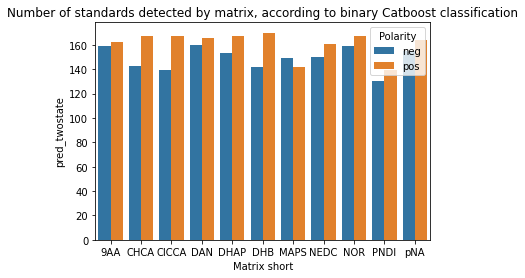

In [13]:
g = sns.barplot(data=result, x='Matrix short', y='pred_twostate', hue='Polarity')
g.set_title('Number of standards detected by matrix, according to binary Catboost classification')

### Example analysis 2

#### How many compounds were detected by each matrix in each chemical class?

- First, map chemical classes to a table of predictions with matrix data that we created above

In [14]:
chem_class.head()

,name_short,coarse_class,fine_class
internal_id,,,
0,D-Glucose,Carbohydrates,Carbohydrates
1,Glucose 6-phosphate,Carbohydrates,Carbohydrate phosphates
3,"Fructose 1,6-bisphosphate",Carbohydrates,Carbohydrate phosphates
4,Dihydroxyacetone phosphate,Carbohydrates,Carbohydrate phosphates
7,3-Phosphoglyceric acid,Carboxylic acids,Carboxylic acid phosphate


In [15]:
df2 = pd.merge(df, chem_class[['name_short', 'coarse_class', 'fine_class']], how='left', on='name_short')
df2.head()

,dataset_id,dataset_name,formula,adduct,neutral_loss,msm,well,name_short,on_off_ratio,occupancy_ratio,...,intensity_vs_far_bg_ratio,intensity_vs_other_spots_ratio,pred_val,pred_twostate,pred_threestate,Polarity,Matrix short,Matrix long,coarse_class,fine_class
0,2021-06-23_23h19m02s,pNA_pos_mz70-1510_2021-06-23_23h19m02s,C23H48NO7P,+H,,0.991038,33,15:0 Lyso PC,344.472855,65.217391,...,344.472855,330.007002,0.907868,1,0,pos,pNA,p-Nitroaniline,Lipids and lipid-like molecules,Glycerophospholipids
1,2021-06-23_23h19m02s,pNA_pos_mz70-1510_2021-06-23_23h19m02s,C23H48NO7P,+H,,0.991038,40,18:0 Lyso PE,6.990623,31.884058,...,6.990623,2.462394,0.838455,1,0,pos,pNA,p-Nitroaniline,Lipids and lipid-like molecules,Glycerophospholipids
2,2021-06-23_23h19m02s,pNA_pos_mz70-1510_2021-06-23_23h19m02s,C23H48NO7P,+Na,,0.986530,33,15:0 Lyso PC,435.094953,78.260870,...,435.094953,361.767799,0.907868,1,0,pos,pNA,p-Nitroaniline,Lipids and lipid-like molecules,Glycerophospholipids
3,2021-06-23_23h19m02s,pNA_pos_mz70-1510_2021-06-23_23h19m02s,C23H48NO7P,+Na,,0.986530,40,18:0 Lyso PE,36.856573,46.376812,...,36.856573,11.098100,0.879956,1,0,pos,pNA,p-Nitroaniline,Lipids and lipid-like molecules,Glycerophospholipids
4,2021-06-23_23h19m02s,pNA_pos_mz70-1510_2021-06-23_23h19m02s,C23H48NO7P,+H,-H2O,0.945902,33,15:0 Lyso PC,296.210083,64.925447,...,296.208783,105.363854,0.907868,1,0,pos,pNA,p-Nitroaniline,Lipids and lipid-like molecules,Glycerophospholipids


- Group and aggregate data

In [16]:
grouped_data2 = df2.groupby(['Matrix short', 'Polarity', 'name_short'])

## In case you want to look at it:
# grouped_data2.agg({list})

In [17]:
agg_data2 = grouped_data2.agg({
    'coarse_class' : 'first',
    'fine_class' : 'first',
    'pred_twostate' : 'any',  
    'pred_threestate' : lambda x: (x==2).any() 
})
agg_data2.head()

coarse_class  \
Matrix short Polarity name_short                                              
9AA          neg      15:0 Lyso PC          Lipids and lipid-like molecules   
                      15:0-18:1 PC          Lipids and lipid-like molecules   
                      15:0-18:1-15:0 TG     Lipids and lipid-like molecules   
                      16:0 Lyso PG          Lipids and lipid-like molecules   
                      16:0 SM (d18:1/16:0)  Lipids and lipid-like molecules   

                                                      fine_class  \
Matrix short Polarity name_short                                   
9AA          neg      15:0 Lyso PC          Glycerophospholipids   
                      15:0-18:1 PC          Glycerophospholipids   
                      15:0-18:1-15:0 TG            Glycerolipids   
                      16:0 Lyso PG          Glycerophospholipids   
                      16:0 SM (d18:1/16:0)         Sphingolipids   

                                            pred_twostate  pred_threestate  
Matrix short Polarity name_short                                            
9AA          neg      15:0 Lyso PC                   True             True  
                      15:0-18:1 PC                   True             True  
                      15:0-18:1-15:0 TG             False             True  
                      16:0 Lyso PG                   True             True  
                      16:0 SM (d18:1/16:0)           True             True

- Answer the question

In [18]:
result2 = agg_data2.groupby(['Matrix short', 'Polarity', 'coarse_class', 'fine_class']).agg({
    'pred_twostate' : 'sum',
    'pred_threestate' : 'sum'
}).reset_index()
result2.head()

,Matrix short,Polarity,coarse_class,fine_class,pred_twostate,pred_threestate
0,9AA,neg,Amines,Other amines,3,4
1,9AA,neg,Amines,Quarternary ammonium amines,6,6
2,9AA,neg,"Amino acids, peptides, and analogues",Acidic amino acids,8,9
3,9AA,neg,"Amino acids, peptides, and analogues",Arginine derivatives (guanidines),3,4
4,9AA,neg,"Amino acids, peptides, and analogues",Aromatic amino acids,6,6


- Here is a plot using matplotlib - not ideal

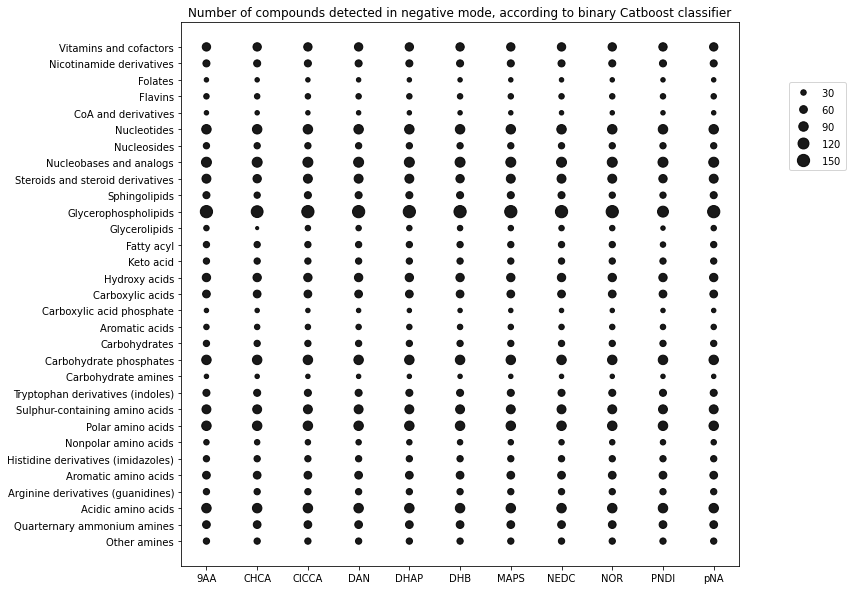

Note that legend is wrong, all number should be divided by 10
Numbers are not normalised wrt to size of the group


In [19]:
plot_data_filtered = result2[result2.Polarity == 'neg']

plt.figure(figsize=(10,10))

g = plt.scatter(x = plot_data_filtered['Matrix short'].values, 
            y = plot_data_filtered['fine_class'].values, 
            s = plot_data_filtered['pred_threestate']*10, alpha=0.9, 
            c='k',
#             c = plot_data_filtered['pred_twostate'], # Can say which column to use for colour here
               )
plt.title("Number of compounds detected in negative mode, according to binary Catboost classifier")
plt.legend(*g.legend_elements("sizes", num=5), bbox_to_anchor=(1.2, 0.9))
plt.show()

print("Note that legend is wrong, all number should be divided by 10")
print("Numbers are not normalised wrt to size of the group")

- Here is a plot in Seaborn - seems easier

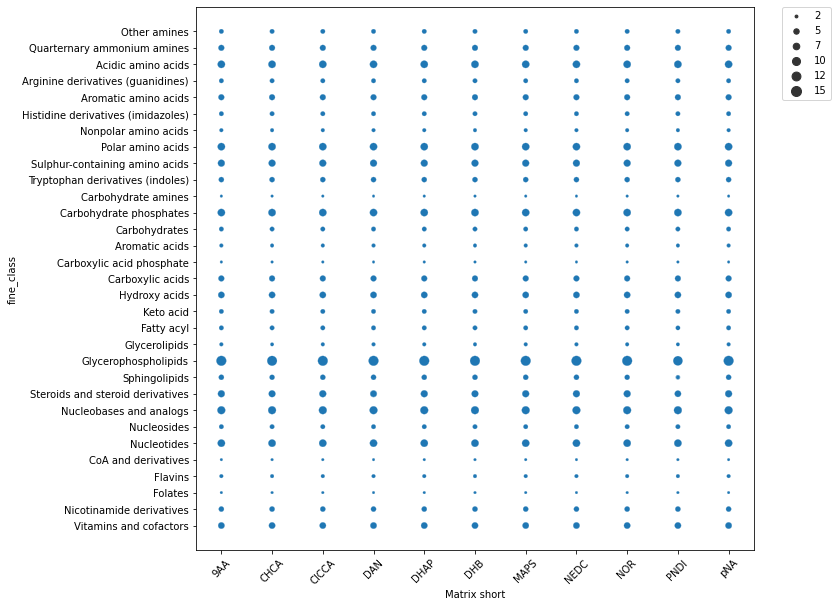

In [24]:
plt.figure(figsize = (10,10))
sns.scatterplot(data=result2, x='Matrix short', y='fine_class', size='pred_threestate', sizes=(1,100))
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

### Example analysis 3

#### What is the sum intensity of all compounds detected by each matrix in each chemical class?

- This can be solved by adding an aggregation rule for one of the spot intensity columns (coming soom: background-corrected mean intensity)

In [26]:
# We want to take into account only detected compounds, so first step is to filter using Catboost column of choice
df3 = df2[df2.pred_twostate == 1]
df3.head()

,dataset_id,dataset_name,formula,adduct,neutral_loss,msm,well,name_short,on_off_ratio,occupancy_ratio,...,intensity_vs_far_bg_ratio,intensity_vs_other_spots_ratio,pred_val,pred_twostate,pred_threestate,Polarity,Matrix short,Matrix long,coarse_class,fine_class
0,2021-06-23_23h19m02s,pNA_pos_mz70-1510_2021-06-23_23h19m02s,C23H48NO7P,+H,,0.991038,33,15:0 Lyso PC,344.472855,65.217391,...,344.472855,330.007002,0.907868,1,0,pos,pNA,p-Nitroaniline,Lipids and lipid-like molecules,Glycerophospholipids
1,2021-06-23_23h19m02s,pNA_pos_mz70-1510_2021-06-23_23h19m02s,C23H48NO7P,+H,,0.991038,40,18:0 Lyso PE,6.990623,31.884058,...,6.990623,2.462394,0.838455,1,0,pos,pNA,p-Nitroaniline,Lipids and lipid-like molecules,Glycerophospholipids
2,2021-06-23_23h19m02s,pNA_pos_mz70-1510_2021-06-23_23h19m02s,C23H48NO7P,+Na,,0.986530,33,15:0 Lyso PC,435.094953,78.260870,...,435.094953,361.767799,0.907868,1,0,pos,pNA,p-Nitroaniline,Lipids and lipid-like molecules,Glycerophospholipids
3,2021-06-23_23h19m02s,pNA_pos_mz70-1510_2021-06-23_23h19m02s,C23H48NO7P,+Na,,0.986530,40,18:0 Lyso PE,36.856573,46.376812,...,36.856573,11.098100,0.879956,1,0,pos,pNA,p-Nitroaniline,Lipids and lipid-like molecules,Glycerophospholipids
4,2021-06-23_23h19m02s,pNA_pos_mz70-1510_2021-06-23_23h19m02s,C23H48NO7P,+H,-H2O,0.945902,33,15:0 Lyso PC,296.210083,64.925447,...,296.208783,105.363854,0.907868,1,0,pos,pNA,p-Nitroaniline,Lipids and lipid-like molecules,Glycerophospholipids


In [34]:
# Group data
grouped_data3 = df3.groupby(['Matrix short', 'Polarity', 'name_short'])

# Aggregate data
agg_data3 = grouped_data3.agg({
    'spot_intensity_bgr_corrected' : 'sum',
    'coarse_class' : 'first',
    'fine_class' : 'first'
})
agg_data3.head()

spot_intensity_bgr_corrected  \
Matrix short Polarity name_short                                           
9AA          neg      15:0 Lyso PC                              0.439221   
                      15:0-18:1 PC                              0.469635   
                      16:0 Lyso PG                              0.458101   
                      16:0 SM (d18:1/16:0)                      0.850168   
                      16:0-18:1 PA                              0.825013   

                                                               coarse_class  \
Matrix short Polarity name_short                                              
9AA          neg      15:0 Lyso PC          Lipids and lipid-like molecules   
                      15:0-18:1 PC          Lipids and lipid-like molecules   
                      16:0 Lyso PG          Lipids and lipid-like molecules   
                      16:0 SM (d18:1/16:0)  Lipids and lipid-like molecules   
                      16:0-18:1 PA          Lipids and lipid-like molecules   

                                                      fine_class  
Matrix short Polarity name_short                                  
9AA          neg      15:0 Lyso PC          Glycerophospholipids  
                      15:0-18:1 PC          Glycerophospholipids  
                      16:0 Lyso PG          Glycerophospholipids  
                      16:0 SM (d18:1/16:0)         Sphingolipids  
                      16:0-18:1 PA          Glycerophospholipids

In [35]:
# Calculate sum intensity in each class
result3 = agg_data3.groupby(['Matrix short', 'Polarity', 'coarse_class', 'fine_class']).agg({
    'spot_intensity_bgr_corrected' : 'sum'
}).reset_index()
result3.head()

,Matrix short,Polarity,coarse_class,fine_class,spot_intensity_bgr_corrected
0,9AA,neg,Amines,Other amines,0.061398
1,9AA,neg,Amines,Quarternary ammonium amines,0.633334
2,9AA,neg,"Amino acids, peptides, and analogues",Acidic amino acids,8.054632
3,9AA,neg,"Amino acids, peptides, and analogues",Arginine derivatives (guanidines),0.733659
4,9AA,neg,"Amino acids, peptides, and analogues",Aromatic amino acids,2.195432


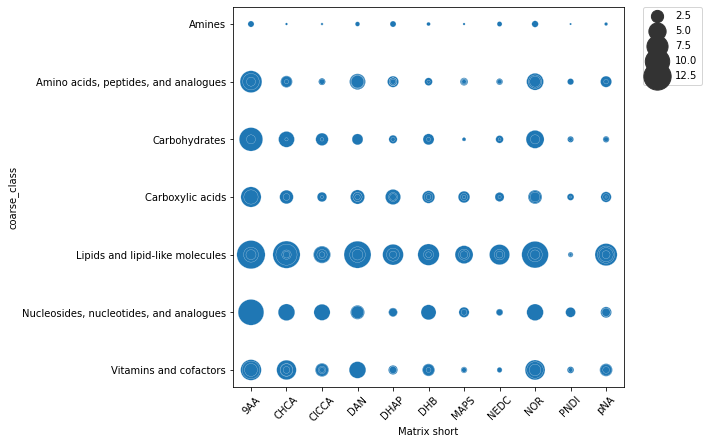

Numbers are not normalised wrt to size of the group
Background-corrected intensity values were used


In [37]:
plot_data_filtered = result3[result3.Polarity == 'neg']
plt.figure(figsize=(7,7))

sns.scatterplot(data=plot_data_filtered, x='Matrix short', y='coarse_class', size='spot_intensity_bgr_corrected', sizes=(1,800))
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

print("Numbers are not normalised wrt to size of the group")
print("Background-corrected intensity values were used")

### Example analysis 4

#### How many ions were detected with each adduct in each matrix?

In [64]:
# Group data
grouped_data4 = df2.groupby(['Matrix short', 'Polarity', 'name_short', 'adduct'])

# Aggregate data
agg_data4 = grouped_data4.agg({
    'pred_twostate' : 'any',  
    'pred_threestate' : lambda x: (x==2).any(),
    'coarse_class' : 'first',
    'fine_class' : 'first'
})
agg_data4.head()

pred_twostate  pred_threestate  \
Matrix short Polarity name_short   adduct                                   
9AA          neg      15:0 Lyso PC +Cl              True             True   
                                   -H               True             True   
                                   [M]-            False             True   
                      15:0-18:1 PC +Cl              True             True   
                                   -H               True             True   

                                                              coarse_class  \
Matrix short Polarity name_short   adduct                                    
9AA          neg      15:0 Lyso PC +Cl     Lipids and lipid-like molecules   
                                   -H      Lipids and lipid-like molecules   
                                   [M]-    Lipids and lipid-like molecules   
                      15:0-18:1 PC +Cl     Lipids and lipid-like molecules   
                                   -H      Lipids and lipid-like molecules   

                                                     fine_class  
Matrix short Polarity name_short   adduct                        
9AA          neg      15:0 Lyso PC +Cl     Glycerophospholipids  
                                   -H      Glycerophospholipids  
                                   [M]-    Glycerophospholipids  
                      15:0-18:1 PC +Cl     Glycerophospholipids  
                                   -H      Glycerophospholipids

In [65]:
# If chemical class doesn't matter
result4 = agg_data4.groupby(['Matrix short', 'Polarity', 'adduct']).agg({
    'pred_twostate' : 'sum',  
    'pred_threestate' : 'sum',
}).reset_index()
result4.head()

,Matrix short,Polarity,adduct,pred_twostate,pred_threestate
0,9AA,neg,+Cl,126,172
1,9AA,neg,-H,144,167
2,9AA,neg,[M]-,95,170
3,9AA,pos,+H,119,164
4,9AA,pos,+K,74,169


In [67]:
# If class matters
result4 = agg_data4.groupby(['Matrix short', 'Polarity', 'coarse_class', 'fine_class', 'adduct']).agg({
    'pred_twostate' : 'sum',  
    'pred_threestate' : 'sum',
}).reset_index()
result4.head()

,Matrix short,Polarity,coarse_class,fine_class,adduct,pred_twostate,pred_threestate
0,9AA,neg,Amines,Other amines,+Cl,2,4
1,9AA,neg,Amines,Other amines,-H,0,4
2,9AA,neg,Amines,Other amines,[M]-,2,4
3,9AA,neg,Amines,Quarternary ammonium amines,+Cl,5,6
4,9AA,neg,Amines,Quarternary ammonium amines,-H,1,6


#### If you want to include intensities in example analysis 4, see how it is done in example analysis 3